<a href="https://colab.research.google.com/github/virtual-bug/GP/blob/master/contentbased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UPLOADING THE DATA

In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Speed Dating Data.csv to Speed Dating Data.csv
User uploaded file "Speed Dating Data.csv" with length 5192296 bytes


# ADDING THE LIBRARY

In [53]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 1.13.0rc1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorflow-estimator, protobuf, keras-preprocessing, keras-applications, absl-py, six, grpcio, gast, termcolor, numpy, astor, wheel, tensorboard
Required-by: stable-baselines, magenta, fancyimpute
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.13.0rc1)
    100% |████████████████████████████████| 35.0MB 930kB/s 
    100% |████████████████████████████████| 890kB 17.7MB/s 
    100% |████████████████████████████████| 245kB 28.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
Successfully built html

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as ts

# EXPLOAR THE DATA

In [57]:

df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [58]:
df.size

1633710

# KERNAL : https://www.kaggle.com/svashishtha/exploring-data

Text(0.5, 1.0, 'Shared Interests')

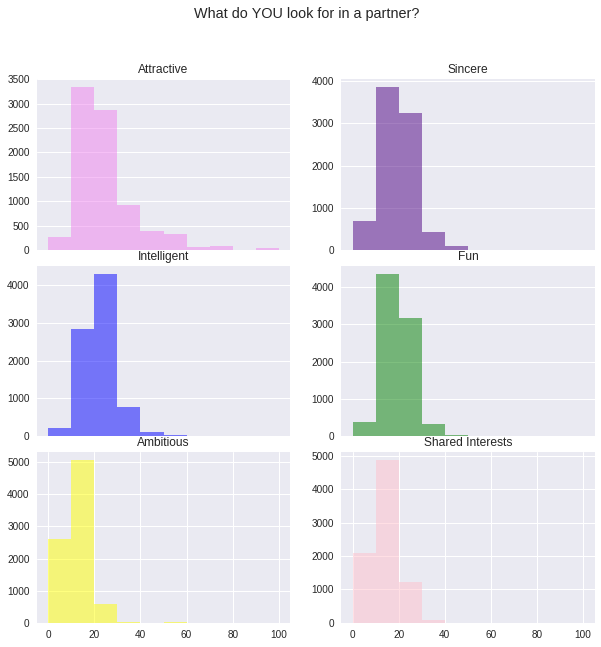

In [59]:
#WHat does a person looks for in a partner ?
fig = plt.figure(figsize=(10,10))
plt.suptitle("What do YOU look for in a partner?")
ax1 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax2 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax3 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax4 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax5 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax6 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)


ax1.hist(df['attr1_1'].dropna(), 10,alpha=0.5, color = 'violet', range=(0,100))
ax1.set_title("Attractive")
ax1.axes.get_xaxis().set_visible(False)

ax2.hist(df['sinc1_1'].dropna(), alpha=0.5, color = 'indigo',  range=(0,100))
ax2.set_title("Sincere")
ax2.axes.get_xaxis().set_visible(False)

ax3.hist(df['intel1_1'].dropna(), alpha=0.5, color = 'blue',  range=(0,100))
ax3.set_title("Intelligent")
ax3.axes.get_xaxis().set_visible(False)

ax4.hist(df['fun1_1'].dropna(), alpha=0.5, color = 'green',  range=(0,100))
ax4.set_title("Fun")
ax4.axes.get_xaxis().set_visible(False)

ax5.hist(df['amb1_1'].dropna(), alpha=0.5, color = 'yellow',  range=(0,100))
ax5.set_title("Ambitious")

ax6.hist(df['shar1_1'].dropna(), alpha=0.5, color = 'pink',  range=(0,100))
ax6.set_title("Shared Interests")

#Comments:
# Intelligent, sincere and fun categories are winning

Text(0.5, 1.0, 'Shared Interests')

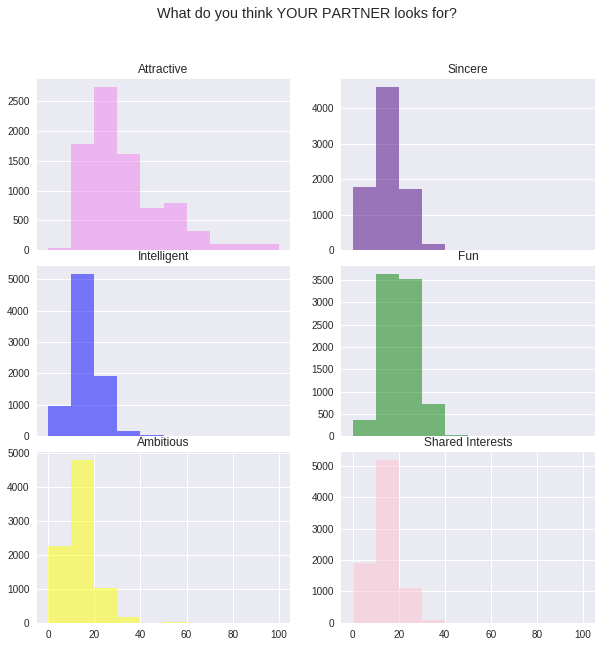

In [62]:
#WHat does a person thinks that their partner would look for ?
fig = plt.figure(figsize=(10,10))
plt.suptitle("What do you think YOUR PARTNER looks for?")
ax1 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax2 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax3 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax4 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax5 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax6 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)


ax1.hist(df['attr2_1'].dropna(), 10,alpha=0.5, color = 'violet',  range=(0,100))
ax1.set_title("Attractive")
ax1.axes.get_xaxis().set_visible(False)

ax2.hist(df['sinc2_1'].dropna(), 10, alpha=0.5, color = 'indigo',  range=(0,100))
ax2.set_title("Sincere")
ax2.axes.get_xaxis().set_visible(False)

ax3.hist(df['intel2_1'].dropna(), 10,alpha=0.5, color = 'blue',  range=(0,100))
ax3.set_title("Intelligent")
ax3.axes.get_xaxis().set_visible(False)

ax4.hist(df['fun2_1'].dropna(), 10,alpha=0.5, color = 'green',  range=(0,100))
ax4.set_title("Fun")
ax4.axes.get_xaxis().set_visible(False)

ax5.hist(df['amb2_1'].dropna(),10, alpha=0.5, color = 'yellow',  range=(0,100))
ax5.set_title("Ambitious")

ax6.hist(df['shar2_1'].dropna(),10, alpha=0.5, color = 'pink',  range=(0,100))
ax6.set_title("Shared Interests")
#Comments:
#Interestingly, plots are different

# ANOTHER KERNAL

In [21]:
# remove some fields we dont want to make data more realistic for us
gj_df = df.drop(['id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','dec_o','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','prob_o','met_o', 'field', 'field_cd', 'mn_sat', 'undergra', 'income', 'tuition', 'race', 'imprace', 'imprelig', 'zipcode', 'goal','date', 'go_out', 'career', 'career_c'], axis=1)


# remove big chunk of unwanted fields at the end 
gj_df = gj_df.loc[:, :'dining']

# and preview for first user
gj_df.head()

,iid,pid,match,age,from,sports,tvsports,exercise,dining
0,1,11.0,0,21.0,Chicago,9.0,2.0,8.0,9.0
1,1,12.0,0,21.0,Chicago,9.0,2.0,8.0,9.0
2,1,13.0,1,21.0,Chicago,9.0,2.0,8.0,9.0
3,1,14.0,1,21.0,Chicago,9.0,2.0,8.0,9.0
4,1,15.0,1,21.0,Chicago,9.0,2.0,8.0,9.0


In [0]:
# remove some fields we dont want to make data more realistic for us
gj_df = df.drop(['id' , 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
                 'order', 'partner', 'int_corr', 'samerace', 'age_o', 'race_o', 
                 'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha'
                 ,'dec_o','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',
                 'like_o','prob_o','met_o', 'field', 'field_cd', 'mn_sat',
                 'undergra', 'income', 'tuition', 'race', 'imprace', 'imprelig','zipcode','date','go_out'
               ], axis=1)


In [38]:
# remove big chunk of unwanted fields at the end 
gj_df = gj_df.loc[:, :'career']

# and preview for first user
gj_df.head(20)

,iid,gender,pid,match,age,from,goal,career
0,1,0,11.0,0,21.0,Chicago,2.0,lawyer
1,1,0,12.0,0,21.0,Chicago,2.0,lawyer
2,1,0,13.0,1,21.0,Chicago,2.0,lawyer
3,1,0,14.0,1,21.0,Chicago,2.0,lawyer
4,1,0,15.0,1,21.0,Chicago,2.0,lawyer
5,1,0,16.0,0,21.0,Chicago,2.0,lawyer
6,1,0,17.0,0,21.0,Chicago,2.0,lawyer
7,1,0,18.0,0,21.0,Chicago,2.0,lawyer
8,1,0,19.0,1,21.0,Chicago,2.0,lawyer
9,1,0,20.0,0,21.0,Chicago,2.0,lawyer


# New Section


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#from sklearn import cross_validation, linear_model

data_df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
data_df.head()
fields = data_df.columns
num_dates_per_male = data_df[data_df.gender == 1].groupby('iid').apply(len)
num_dates_per_female = data_df[data_df.gender == 0].groupby('iid').apply(len)


# 1.Preprocessing
def str_to_float(series):
    return series.apply(lambda x: str(x).replace(",", "")).astype('float64')

for trait in ['mn_sat', 'tuition', 'income']:
    data_df[trait] = str_to_float(data_df[trait])

    
data_df['pid'] = data_df['pid'].fillna(-1.0).astype('int64')  # Invalid PID as -1

# standardize features
def standardize_feature(series):
    return (series - series.mean()) / series.std(ddof=0)
    
    
# 2.PROFILE OF THE PERSON
#     2.1 'tuition' + 'income' -> 'financial'

# fill out the nan in tuition and income to be mean value.
data_df['tuition']=data_df['tuition'].fillna(data_df['tuition'].mean())
data_df['income']=data_df['income'].fillna(data_df['income'].mean())


# standardize -> plus, not used

# data_df['financial'] = standardize_feature(data_df['tuition']) \
#                        .add(standardize_feature(data_df['income']), fill_value=0.0)

# plus -> standardize
data_df['financial'] = standardize_feature((data_df['tuition']) \
                       .add((data_df['income'])))

    
    
#     2.2 'date' + 'go_out' -> 'experience' 
#     fill nan
data_df['date']=data_df['date'].fillna(data_df['date'].mean())
data_df['go_out']=data_df['go_out'].fillna(data_df['go_out'].mean())

#     importance bet/ date and go_out. giving date more weight.
a=5
b=1
data_df['experience'] = a*data_df['date'] + b*data_df['go_out']
data_df['experience'] = standardize_feature(data_df['experience'])


#     2.3 'mn_sat' -> 'intelligence'
data_df['int'] = standardize_feature(data_df['mn_sat']);
data_df['int'] = data_df['int'].fillna(value = 0)

# 3 pairwise features for male participants

#     3.0
# divide them into female data and male data
data_df_m = data_df[data_df.gender == 1] #data of male
data_df_f = data_df[data_df.gender == 0] #data of female


# Create a dataframe containing information for each person that needs to be looked up
# profiles = data_df[['iid', 'mn_sat', 'goal', 'field_cd', 'financial', 'experience']]\
#            .set_index(keys='iid').drop_duplicates()
    
profiles_m = data_df_m[['iid', 'int',  'field_cd', 'financial', 'experience','career_c']]\
           .set_index(keys='iid').drop_duplicates()
for trait in ['int', 'financial', 'experience']:
#     profiles_m[trait] = profiles_m[trait].fillna(profiles_m[trait].mean())  # Fill NaN values with mean
    profiles_m[trait] = profiles_m[trait].fillna(value=0)


# data_df_m = data_df_m.fillna(data_df_m.mean())

profiles_f = data_df_f[['iid', 'int',  'field_cd', 'financial', 'experience','career_c']]\
           .set_index(keys='iid').drop_duplicates()
for trait in ['int', 'financial', 'experience']:
#     profiles_f[trait] = profiles_f[trait].fillna(profiles_f[trait].mean())  # Fill NaN values with mean
    profiles_f[trait] = profiles_f[trait].fillna(value=0)


##########################################################################

#     3.1 age difference =  male age - female age
data_df_m['age_diff'] = data_df_m['age'].sub(data_df_m['age_o'])  # Age difference
# If nan, set the value to be 0.
data_df_m['age_diff'] = data_df_m['age_diff'].fillna(value=0)
data_df_m['age_diff'] = standardize_feature(data_df_m['age_diff'])

#     3.2 same field
def is_similar_profession(x, profiles):
    if np.isnan(x['field_cd']) or np.isnan(x['pid']) or x['pid'] not in profiles.index or \
    x['field_cd'] != profiles.loc[x['pid']]['field_cd']:
        return -1
    else:
        return int(x['field_cd'] == profiles.loc[x['pid']]['field_cd'])
    
data_df_m['sim_profession'] = data_df_m[['field_cd', 'pid']]\
                            .apply(lambda x: is_similar_profession(x, profiles_f), axis=1)


#     3.2 same career
def is_similar_career(x, profiles):
    if np.isnan(x['career_c']) or np.isnan(x['pid']) or x['pid'] not in profiles.index or\
        x['career_c'] != profiles.loc[x['pid']]['career_c']:
        return -1
    else:
        return int(x['career_c'] == profiles.loc[x['pid']]['career_c'])
    
data_df_m['sim_career'] = data_df_m[['career_c', 'pid']]\
                            .apply(lambda x: is_similar_career(x, profiles_f), axis=1)
    
    
    
    

#     3.4 basic traits diffrence (standardized)
    
def trait_difference(trait):
    trait_other = data_df_m['pid'].apply(lambda x: profiles_f.loc[x][trait] if x in profiles_f.index else None)
    return data_df_m[trait].sub(trait_other)
    
# basic trait difference : male - female
for trait in ['int','experience', 'financial']:
    string= trait + '_diff'
    data_df_m[string] = trait_difference(trait)
    data_df_m[string] = data_df_m[string].fillna(value=0) 

data_df_m.loc[data_df_m['pid']==21].loc[data_df_m['iid']==40]
# data_df_m.loc[data_df_m['iid']==11]['pid']

############################################################
#     3.5.1 preprocess. 
attr_exp = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
attr_o = ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']

# profiles_f = data_df_f[['iid', 'int',  'field_cd', 'financial', 'experience','career_c']]\
#            .set_index(keys='iid').drop_duplicates()

# attr comes from original data, contains only the pair ids and attributes we need.
attr = data_df[['iid','gender','pid','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',\
               'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']].set_index(keys='iid').drop_duplicates()

# data_norm['sum1']=data_norm[f1].sum(axis=1)
attr['attr1_sum']=attr[attr_exp].sum(axis=1)
attr['attr3_sum']=attr[attr_o].sum(axis=1)

#############################################################

df_train = data_df_m[['iid','pid','match', 'age_diff','sim_profession','sim_career','int_diff','experience_diff','financial_diff']]
df_train['rating'] = np.zeros(len(df_train))

attr_exp_n = []
attr_o_n = []

for trait in attr_exp:
    
    attr[trait + '_n'] = attr[trait]/attr['attr1_sum'] 
    attr_exp_n.append(trait+'_n')

    
for trait in attr_o:
    
    attr[trait + '_n'] = attr[trait]/attr['attr3_sum'] 
    attr_o_n.append(trait+'_n')


    #######################################################
    
    
attr[attr_exp_n] = attr[attr_exp_n].fillna(value=1.0/6).astype('float64')
attr[attr_o_n] = attr[attr_o_n].fillna(value=1.0/6).astype('float64')

attr_m = attr[attr.gender == 1];
attr_f = attr[attr.gender == 0];


for i in attr_m.index.drop_duplicates():
    for j in attr_m.loc[i].pid:
        # j = female iid, (i,j) makes a pair
        temp1=0
        temp2=0
        temp3=0
        for k in np.arange(0,6):

            if i not in attr_m.index or \
                j not in attr_f.index:
                
                temp1 = 0
                temp2 = 0
            else:

                temp1 = attr_m.loc[attr_m['pid']==j].loc[i][attr_exp_n[k]]
                temp2 = attr_f.loc[attr_f['pid']==i].loc[j][attr_o_n[k]]
            temp3 += temp1*temp2

        get_index = df_train.loc[df_train['iid']==i].loc[df_train['pid']==j].index
        
        df_train.set_value(get_index,'rating',temp3)


df_train['rating']=standardize_feature((df_train['rating']))   

df_test=df_train[3000:]
print(df_test)
df_train=df_train[:3000]
print(df_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

      iid  pid  match  age_diff  sim_profession  sim_career  int_diff  \
6209  403  394      0 -0.536224              -1          -1 -0.670775   
6210  403  395      0 -2.458200              -1          -1  0.000000   
6211  403  396      0 -0.749777              -1          -1  2.409901   
6212  404  379      0 -3.312411              -1           1 -0.078016   
6213  404  380      0 -2.244647              -1          -1  0.080609   
6214  404  381      0 -0.322671              -1          -1 -0.336827   
6215  404  382      1 -1.176883              -1          -1  0.000000   
6216  404  383      1 -0.963330              -1           1  0.331071   
6217  404  384      1 -0.109119              -1          -1 -0.587288   
6218  404  385      1 -0.536224              -1          -1  1.625122   
6219  404  386      0 -0.749777              -1          -1 -0.837750   
6220  404  387      1 -0.536224              -1          -1  0.347768   
6221  404  388      0 -0.322671              -1    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
